# Project: Titanic passengers survival 

### by Mohamed.elhaddad 
## Table of Contents
- [Introduction](#intro)
- [wrangling](#wrangling)
- [Univariate Exploration](#univariate)
- [Bivariate Explorationn](#bivariate)
- [Summary](#summary)

<a id='intro'></a>
# Introduction 
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

### features we are interested in :
survived, sex, age, fare, class, embark_town, alone.


<a id='wrangling'></a>
## Data Wrangling
> In this step we will import libraries wich will help us in our analysis and explore our data to know what operation we need to do to make our data clean and tidy .

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sb 
import matplotlib.pyplot as plt 

In [3]:
df_r = pd.read_csv("Data//titanic.csv")
df = df_r.copy()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:

df['pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: int64

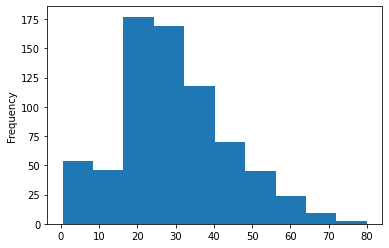

In [24]:
df['age'].plot.hist();

In [3]:
df.drop(['pclass', 'sibsp' , 'parch' , 'embarked' , 'adult_male' , 'deck', "who" , 'alive' ], axis=1, inplace=True)

In [4]:
df.drop([61,829],axis=0,inplace=True)

In [5]:
df.replace( np.NAN , df.age.mean() , inplace=True )

In [6]:
df.head()

,survived,sex,age,fare,class,embark_town,alone
0,0,male,22.0,7.2500,Third,Southampton,False
1,1,female,38.0,71.2833,First,Cherbourg,False
2,1,female,26.0,7.9250,Third,Southampton,True
3,1,female,35.0,53.1000,First,Southampton,False
4,0,male,35.0,8.0500,Third,Southampton,True




<a id='univariate'></a>

## Univariate Exploration

> In this section,  I investigate the distributions of individual variables of interest. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

# what is the distripution of survival ? 

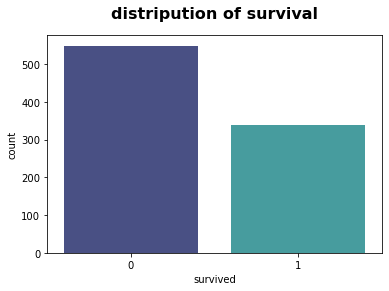

In [7]:
sb.countplot(data = df ,x=df.survived , palette = 'mako'  );
plt.title('distripution of survival' , y=1.05, fontsize=16, fontweight='bold');

> Observation(1): Most of the Titanic passengers didn't survive.

# what is the distripution of sex  ? 

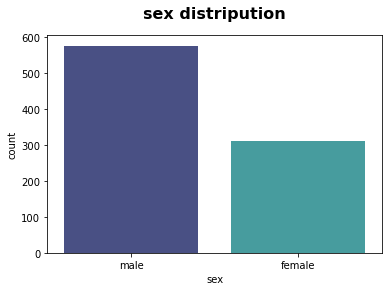

In [8]:
sb.countplot(data = df ,x=df.sex  , palette = 'mako');
plt.title('sex distripution' , y=1.05, fontsize=16, fontweight='bold');

> Observation(2): Most of the Titanic passengers were males. 

# what is the distripution of age ? 


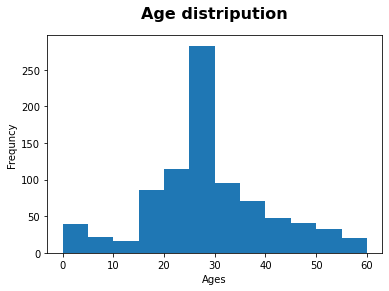

In [9]:
bin_edges = np.arange(0, 65, 5)
plt.hist(data = df, x = 'age', bins = bin_edges);
plt.title('Age distripution' , y=1.05, fontsize=16, fontweight='bold');
plt.xlabel('Ages');
plt.ylabel('Frequncy');

> Observation(3): Most of the Titanic passengers ages were between 25 and 30 years.

# what is the distripution of class type  ?

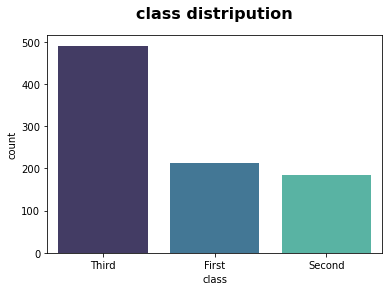

In [10]:
sb.countplot(data = df ,x=df['class'] , palette = 'mako');
plt.title('class distripution' , y=1.05, fontsize=16, fontweight='bold');

> Observation(4): Most of the Titanic passengers were in the third class.

# what is the distripution of embark_town ?

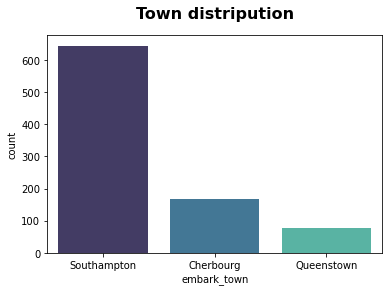

In [11]:
sb.countplot(data = df ,x=df['embark_town'], palette = 'mako');
plt.title('Town distripution' , y=1.05, fontsize=16, fontweight='bold');

> Observation(5): Most of the Titanic passengers  were from southampton.

<a id='bivariate'></a>
## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in the flights
data. First, I am going to make a data frame that include only the data need for this study. I will also create calculated columns in this data frame so that I can use it in multivariate exploration as well.

# what is  the relation between sex and survival?

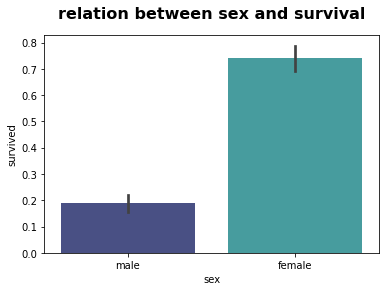

In [12]:
sb.barplot(data = df , x=df.sex , y=df.survived , palette = 'mako' );
plt.title('relation between sex and survival' , y=1.05, fontsize=16, fontweight='bold');

> Observation(6): It is clear that a very large proportion of the survivors were female, although the number of males on the ship was greater than the number of females.

# what is the relation between age and survival?

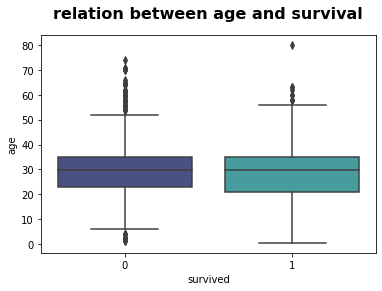

In [17]:
sb.boxplot(data = df , x=df.survived , y=df.age , palette = 'mako' );
plt.title('relation between age and survival' , y=1.05, fontsize=16, fontweight='bold');

> Observation(7): There is a very weak correlation between survival and age

# what is the relation between class and survival?

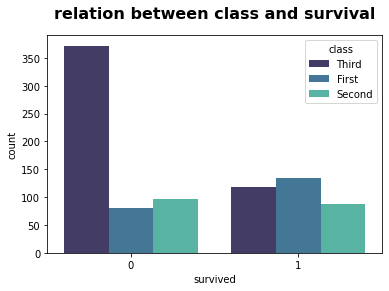

In [14]:
sb.countplot(data = df ,x=df.survived , hue='class' , palette = 'mako'  );
plt.title('relation between class and survival' , y=1.05, fontsize=16, fontweight='bold');

> observation(8): A very large percentage of the non-surviving passengers were from the third class
And the largest percentage of surviving passengers were from the first class,
This means that the first class is equipped with more safety measures than the second and third classes

# what is the relation between that the passenger alone and survival?


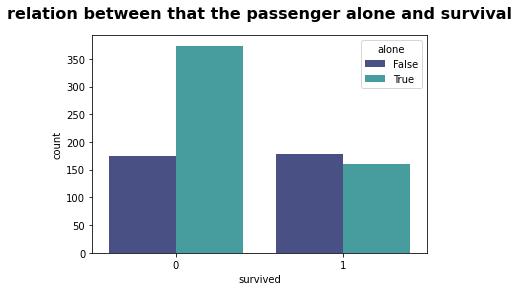

In [15]:
sb.countplot(data = df ,x=df.survived , hue='alone' , palette = 'mako'  );
plt.title('relation between that the passenger alone and survival' , y=1.05, fontsize=16, fontweight='bold');

> observation(9): Passengers who were alone were more likely to not survive

# what is the relation between that the passenger alone,class and sex ? 

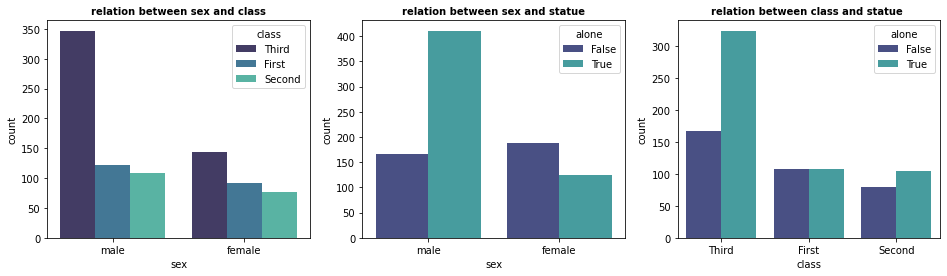

In [16]:
plt.figure(figsize = (16,4));

plt.subplot(1, 3, 1)
sb.countplot(data = df ,x=df.sex , hue='class' , palette = 'mako'  );
plt.title('relation between sex and class' , y=1, fontsize=10, fontweight='bold');


plt.subplot(1, 3, 2);
sb.countplot(data = df ,x=df.sex , hue='alone' , palette = 'mako'  );
plt.title('relation between sex and statue' , y=1, fontsize=10, fontweight='bold');

plt.subplot(1, 3, 3);
sb.countplot(data = df ,x='class' , hue='alone' , palette = 'mako'  );
plt.title('relation between class and statue ' , y=1, fontsize=10, fontweight='bold');

> observation(10): Since the percentage of males who were alone is more and the percentage of males was greater in the third class, I think this means that the percentage of males was high because most of the workers in the ship are males and they are the largest percentage in the non-survival.

<a id='summary'></a>
# Summary
## If we want to predict that the passenger will survive or not we can look at forward : 

#### It is expected that the ship's passengers survive if : 
- sex was female. 
- passenger from first class. 
- passenger wasn't alone. 
- passenger didn't from workers at titanic crew. 

#### It is not expected that the ship's passengers survive if : 
- sex was male. 
- passenger from second or third class. 
- passenger was alone.
- passenger from workers at titanic crew.  


## Another insights 
- Most of the Titanic passengers didn't survive.
- Most of the Titanic passengers ages were between 25 and 30 years.
- Most of the Titanic passengers were in the third class.
- Most of the Titanic passengers were from southampton.